<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-March/blob/main/Decision_Tree/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

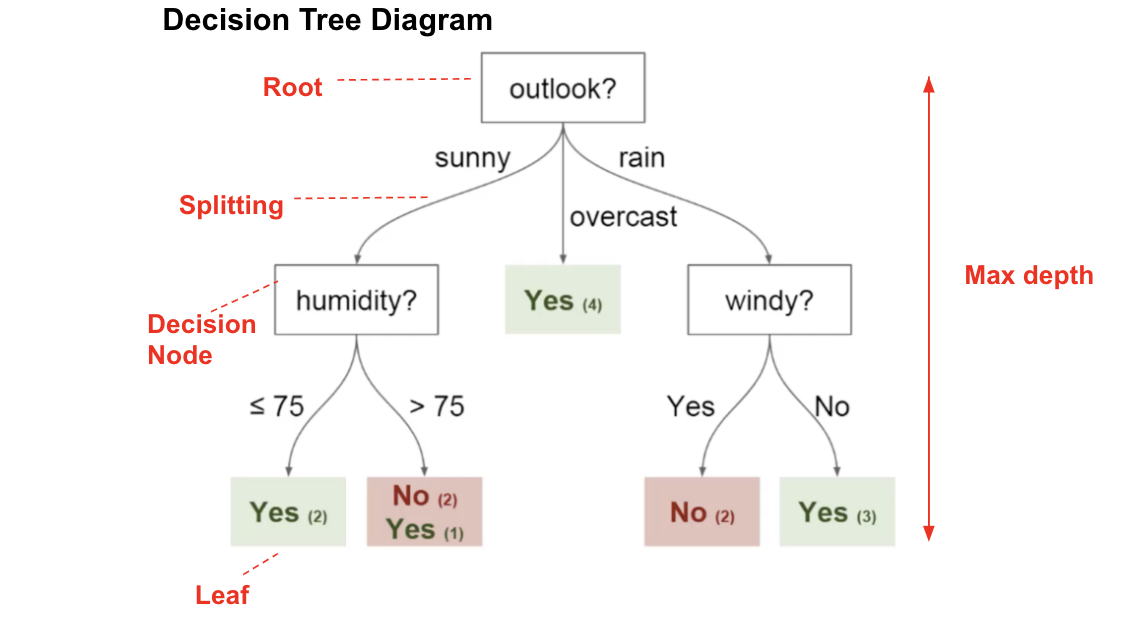